<a href="https://colab.research.google.com/github/palkop11/soh-ml/blob/master/interaction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# mount google drive
# so you can upload DATA from drive
# to colab environment

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# clone repo
# works when repo is public

!git clone https://github.com/palkop11/soh-ml.git

# jump to repo directory

%cd soh-ml

fatal: destination path 'soh-ml' already exists and is not an empty directory.
/content/soh-ml


In [3]:
# upload dataset_v5_npz.zip anywhere in google drive
# find it and then extract it into temporary workspace

!find /content/drive -name "dataset_v5_ts_npz.zip" | xargs -I {} unzip -qo {} -d "./DATA/"
!find /content/soh-ml/DATA -maxdepth 1

/content/soh-ml/DATA
/content/soh-ml/DATA/dataset_v5_ts_npz


In [4]:
"""
here should be pip install from requirements_colab for reproducibility
but now it only gives errors while installing and imports :/
!pip install -r requirements_colab.txt -q
"""

!pip install tensorboard tbparse pytorch-lightning lightning -q

In [5]:
%cd /content/soh-ml/

/content/soh-ml


In [6]:
import learning

from lightning import seed_everything
seed_everything(42)

INFO: Seed set to 42
INFO:lightning.fabric.utilities.seed:Seed set to 42


42

In [7]:
# you can use run_experiment to run
# pass learning.DEFAULT_CONFIG to use default config
# or you can specify your own dictionary and run experiment using it
# also you can pass PATH to config in .yaml format
#learning.run_experiment(learning.DEFAULT_CONFIG)

In [8]:
# or you can run !python learning.py with default_config
# you can specify config using !python learning.py --config /path/to/config.yaml

In [9]:
#learning.DEFAULT_CONFIG

In [10]:
config_1 = {
    'experiment_name': 'testing_on_small', # also used for TensorBoard logging
    'seed': 42,

    'data': {
        'datadir':'./DATA/dataset_v5_ts_npz/',
        'train': [
                    'small_LFP4',
                    'small_LFP8',
                    'small_LFP1',
                    'small_NMC10',
                    'small_NMC14',
                    'small_NMC15',
                ],
        'val': ['small_LFP5', 'small_NMC11'],
        #'test': None, # comment this line if you do not pass test dataset
        'normalization': {'x': None, 'y': 'minmax_zero_one'},
        'n_diff': 0,
    },

    'model': {
        'input_size': 2,
        'cnn_hidden_dim': 32,
        'lstm_hidden_size': 32,
        'num_layers': 1,
        'output_size': 1,
        'dropout': 0.,
        'regressor_hidden_dim': 1024,
        'output_activation': 'sigmoid',
    },

    'resume_ckpt': None,
    'loss_type': 'mse',

    'training': {
        'batch_size': 32,
        'learning_rate': 1e-3,
        'epochs': 1,
        'accelerator': 'auto',
        'devices': 1,
    },

    'logging': {
        'log_dir': './LOGS',
        'progress_bar': True,
    }
}

INFO: GPU available: False, used: False
INFO:lightning.pytorch.utilities.rank_zero:GPU available: False, used: False
INFO: TPU available: False, using: 0 TPU cores
INFO:lightning.pytorch.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO: HPU available: False, using: 0 HPUs
INFO:lightning.pytorch.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.callbacks.model_summary:
  | Name          | Type                | Params | Mode 
--------------------------------------------------------------
0 | model         | UnifiedBatteryModel | 45.5 K | train
1 | loss_fn       | MSELoss             | 0      | train
2 | train_metrics | MetricCollection    | 0      | train
3 | val_metrics   | MetricCollection    | 0      | train
4 | test_metrics  | MetricCollection    | 0      | train
--------------------------------------------------------------
45.5 K    Trainable params
0         Non-trainable params
45.5 K    Total params
0.182     Total estimated model pa

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.11/dist-packages/torchmetrics/utilities/prints.py:43: UserWarning: The variance of predictions or target is close to zero. This can cause instability in Pearson correlationcoefficient, leading to wrong results. Consider re-scaling the input if possible or computing using alarger dtype (currently using torch.float32). Setting the correlation coefficient to nan.
  warnings.warn(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/pytorch_lightning/loops/fit_loop.py:310: The number of training batches (1) is smaller than the logging interval Trainer(log_every_n_steps=50). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.


Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO: `Trainer.fit` stopped: `max_epochs=1` reached.
INFO:lightning.pytorch.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=1` reached.


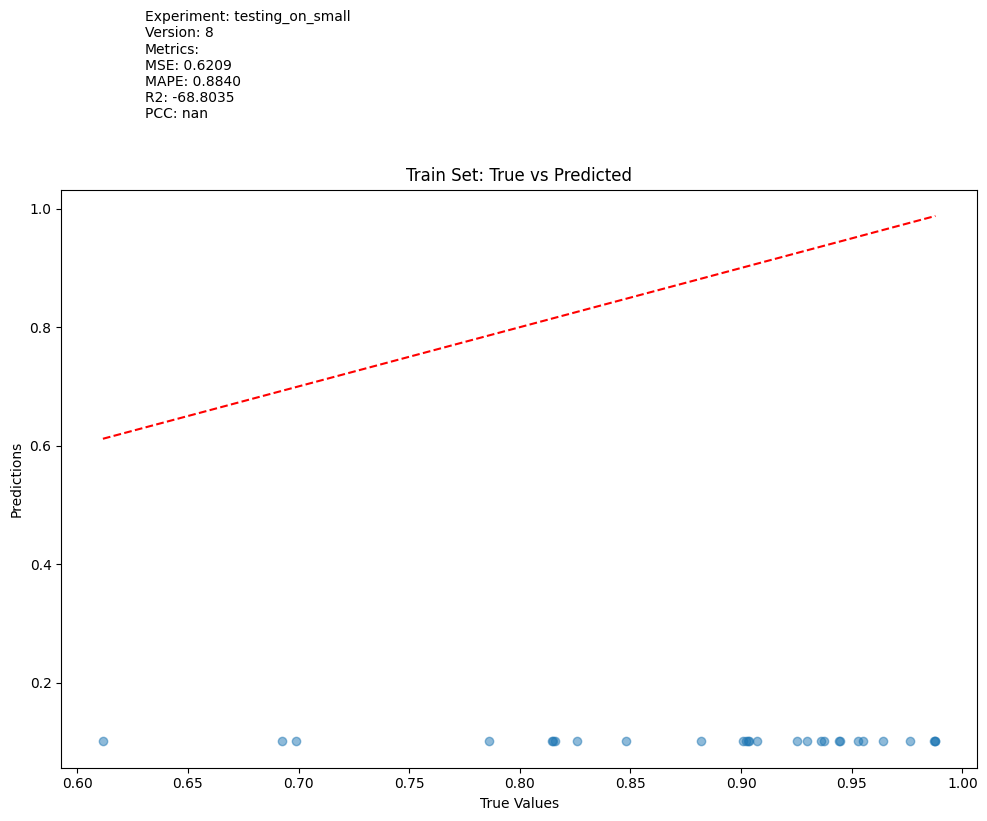

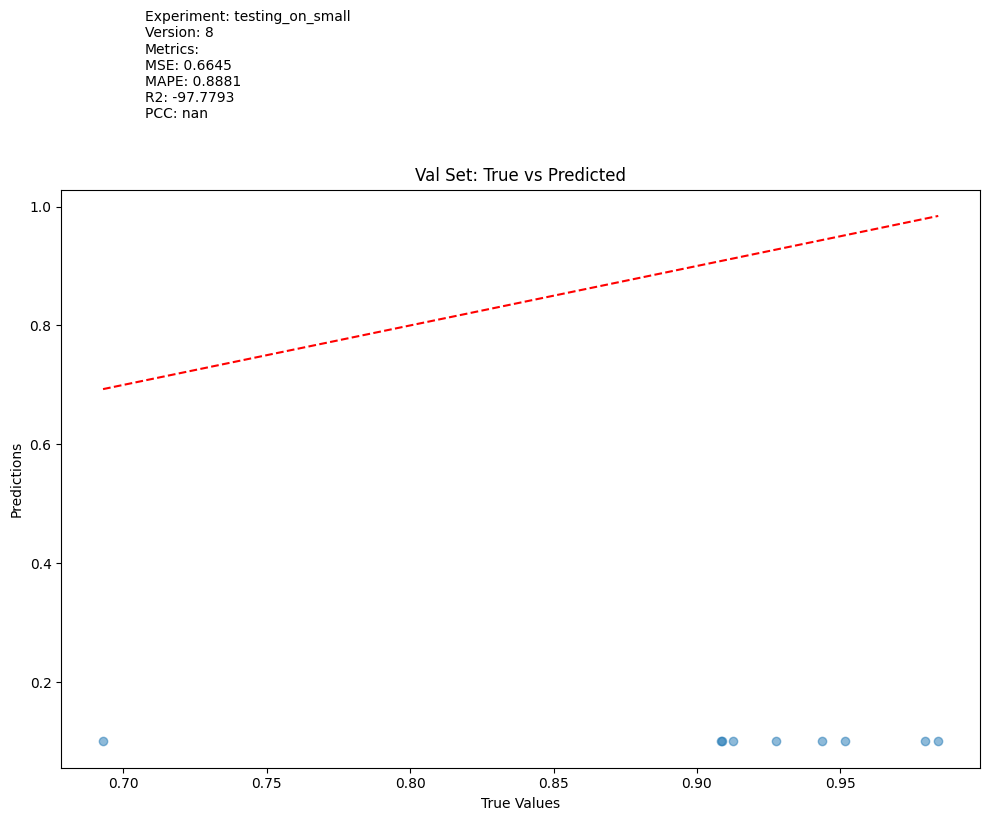

metrics on train:


/usr/local/lib/python3.11/dist-packages/pytorch_lightning/trainer/connectors/data_connector.py:476: Your `val_dataloader`'s sampler has shuffling enabled, it is strongly recommended that you turn shuffling off for val/test dataloaders.


Validation: |          | 0/? [00:00<?, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃      Validate metric      ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         val_loss          │    0.6209157705307007     │
│         val_mape          │    0.8839991688728333     │
│          val_mse          │    0.6209157705307007     │
│          val_pcc          │            nan            │
│          val_r2           │    -68.80245208740234     │
└───────────────────────────┴───────────────────────────┘

metrics on val:


Validation: |          | 0/? [00:00<?, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃      Validate metric      ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         val_loss          │    0.6645255088806152     │
│         val_mape          │    0.8880932331085205     │
│          val_mse          │    0.6645255088806152     │
│          val_pcc          │            nan            │
│          val_r2           │    -97.77928161621094     │
└───────────────────────────┴───────────────────────────┘

In [12]:
learning.run_experiment(config_1)